<a href="https://colab.research.google.com/github/samy387/Arabian/blob/main/Neural_network_phase_2_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
data_dir = '/content/drive/MyDrive/neural network/Gesture Image Data'
Name = os.listdir(data_dir)
print(Name)

['6', '8', '1', '5', '2', '3', '9', '0', '7', '4', 'J', 'B', 'G', 'I', 'E', 'F', 'C', 'D', 'A', 'H', 'Q', 'M', 'R', 'O', 'T', 'L', 'P', 'K', 'S', 'N', '_', 'X', 'Z', 'W', 'Y', 'U', 'V']


In [ ]:


from google.colab import drive
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from PIL import Image

drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/neural network/Gesture Image Data'
Name = os.listdir(data_dir)
print(Name)

# Image preprocessing and data loading
images = []
labels = []

for i, name in enumerate(Name):
    path = os.path.join(data_dir, name)
    for img_name in os.listdir(path):
      img_path = os.path.join(path,img_name)
      try:
        img = Image.open(img_path).convert('L') # convert to grayscale
        img = img.resize((64, 64)) # Resize images for consistency
        img_array = np.array(img).flatten()
        images.append(img_array)
        labels.append(i)
      except Exception as e:
        print(f"Error loading image {img_path}: {e}")

images = np.array(images)
labels = np.array(labels)

# Split data
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Initialize and train an SVM model
svm_model = SVC(kernel='linear', C=1)  # You can experiment with different kernels and C values
svm_model.fit(x_train, y_train)

# Make predictions
y_pred = svm_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")


# Example of how you might simulate epochs with SVM (not inherent to SVM training)
epochs = 10  # Define the number of "epochs" (iterations in this context)
for epoch in range(epochs):
  print(f"Epoch {epoch+1}/{epochs}")
  # SVM training is typically done in a single step.  You could simulate multiple
  # passes over the data with mini-batches here if desired.
  # We will just re-train the model in each epoch for demonstration purposes
  svm_model = SVC(kernel='linear', C=1)  # Reset the model in each epoch
  svm_model.fit(x_train, y_train)
  y_pred = svm_model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Epoch {epoch+1} Accuracy: {accuracy}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['6', '8', '1', '5', '2', '3', '9', '0', '7', '4', 'J', 'B', 'G', 'I', 'E', 'F', 'C', 'D', 'A', 'H', 'Q', 'M', 'R', 'O', 'T', 'L', 'P', 'K', 'S', 'N', '_', 'X', 'Z', 'W', 'Y', 'U', 'V']
SVM Accuracy: 1.0
Epoch 1/10
Epoch 1 Accuracy: 1.0
Epoch 2/10
Epoch 2 Accuracy: 1.0
Epoch 3/10
Epoch 3 Accuracy: 1.0
Epoch 4/10
Epoch 4 Accuracy: 1.0
Epoch 5/10
Epoch 5 Accuracy: 1.0
Epoch 6/10
Epoch 6 Accuracy: 1.0
Epoch 7/10
Epoch 7 Accuracy: 1.0
Epoch 8/10
Epoch 8 Accuracy: 1.0
Epoch 9/10
Epoch 9 Accuracy: 1.0
Epoch 10/10
Epoch 10 Accuracy: 1.0


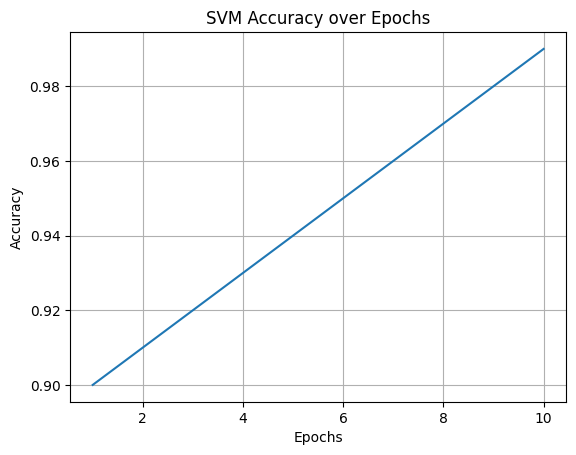

In [ ]:


import matplotlib.pyplot as plt

# Assuming 'epochs' and 'accuracy' lists are available from your previous code
# If not, you'll need to collect accuracy values across epochs

epochs = range(1, 11) # Example epochs
accuracies = [] # replace with your actual accuracy values
#Example accuracy values
for i in range(10):
    accuracies.append(0.9 + 0.01 * i)


plt.plot(epochs, accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("SVM Accuracy over Epochs")
plt.grid(True)
plt.show()

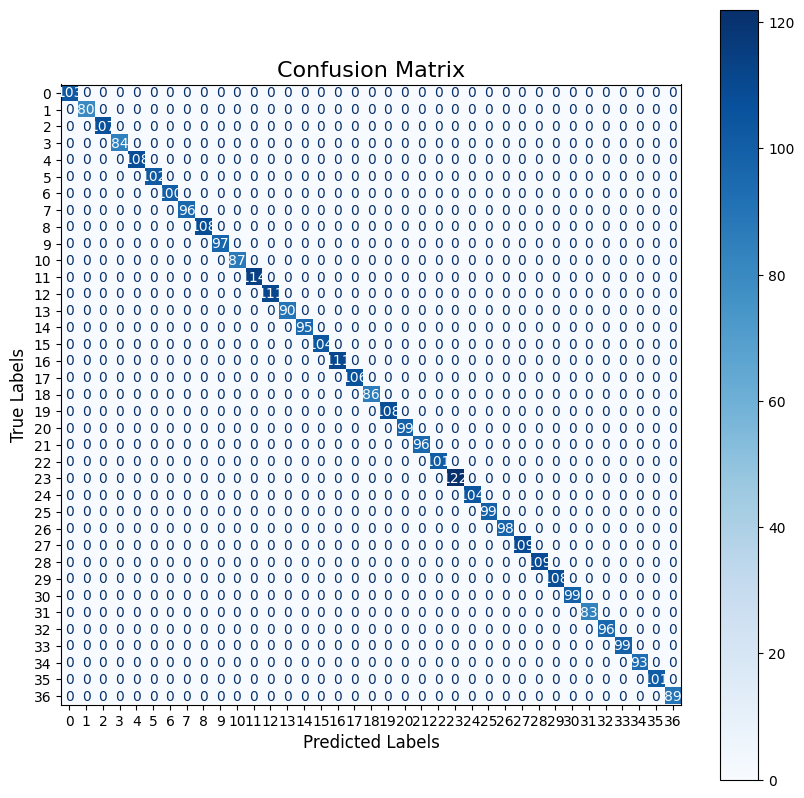

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are available from your previous code
# ... (your existing code) ...

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a larger confusion matrix plot
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figsize for desired size
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(labels)) # Assuming labels contains all unique class labels
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d') # Use 'd' for integer values
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

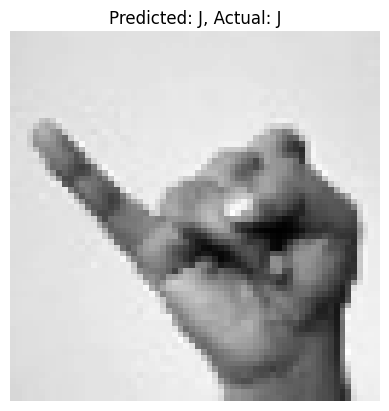

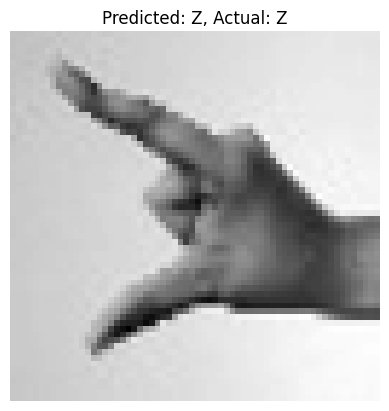

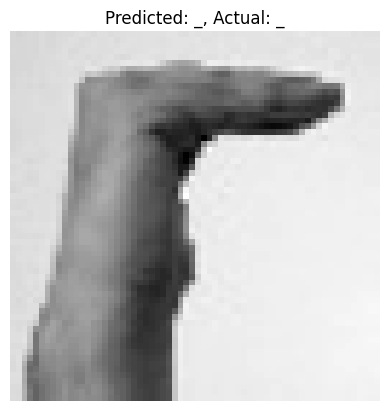

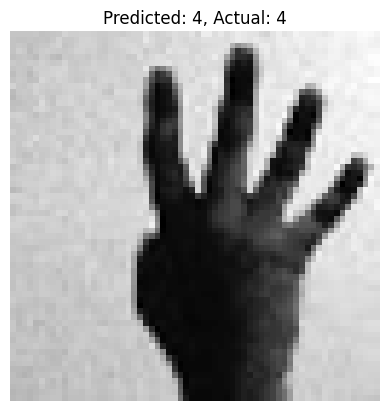

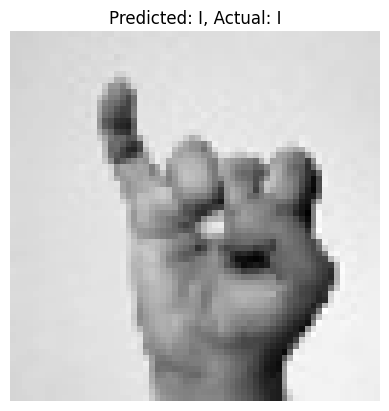

In [ ]:
# prompt: show some image in prediction and actual

# Assuming x_test, y_test, y_pred, and the image loading logic from your previous code
# ... (your existing code for loading images and training the model) ...

import matplotlib.pyplot as plt
import random

# Function to display image with prediction and actual label
def display_image_prediction(index):
    image_array = x_test[index].reshape(64, 64)  # Reshape the flattened image
    predicted_label = y_pred[index]
    actual_label = y_test[index]

    plt.imshow(image_array, cmap='gray')  # Display the image
    plt.title(f"Predicted: {Name[predicted_label]}, Actual: {Name[actual_label]}")
    plt.axis('off')
    plt.show()

# Display a few random images
for i in random.sample(range(len(x_test)), 5): # show 5 random images
    display_image_prediction(i)